# First Classification 🐥🐥

0. Import usual libraries

In [14]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import seaborn as sns

1. Download the following data using this link : ```s3://full-stack-bigdata-datasets/Machine Learning Supervisé/Régression logistique Cross validation/Datasets/ex2data1.txt``` and put it into a DataFrame

In [6]:
data = pd.read_csv('s3://full-stack-bigdata-datasets/Machine Learning Supervisé/Régression logistique Cross validation/Datasets/ex2data1.txt', header=None)

In [7]:
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


2. Rename the columns using the following names : 

"Col_1" / "Col_2" / "Target"

In [8]:
data.columns = ['Col_1', 'Col_2', 'Target']
data.head()

,Col_1,Col_2,Target
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


3. Visualize the data as a scatter plot where the two different classes are displayed with different colors.

<AxesSubplot:xlabel='Col_1', ylabel='Col_2'>

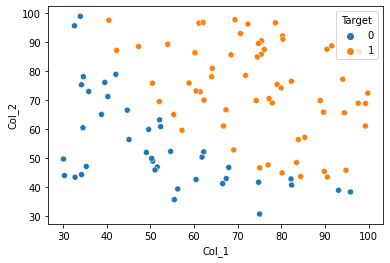

In [35]:
# scatter plot with seaborn
sns.scatterplot(x='Col_1', y='Col_2', hue='Target', data=data)







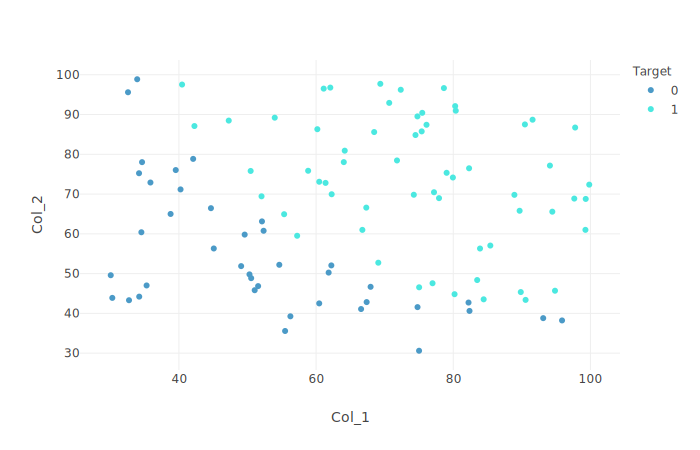

4. Separate X and y into two different objects.

In [46]:
X = data[["Col_1", "Col_2"]]
y = data["Target"]
print (X.head())
print (y.head())

       Col_1      Col_2
0  34.623660  78.024693
1  30.286711  43.894998
2  35.847409  72.902198
3  60.182599  86.308552
4  79.032736  75.344376
0    0
1    0
2    0
3    1
4    1
Name: Target, dtype: int64


5. Split the data into a train set and a test set

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

6. Analyze the explanatory variables, should we normalize the data ? If so normalize the data.

In [60]:
data.describe()

,Col_1,Col_2,Target
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [61]:
# normalize data
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)


array([[ 0.46190865,  1.24836429],
       [-0.17579369,  1.63835015],
       [ 0.67560897,  0.48415499],
       [ 0.99548268, -0.50130755],
       [-0.67605684, -0.17399578],
       [-0.66400724, -0.30103424],
       [ 0.11908004, -1.06015227],
       [-0.25687821,  0.36297467],
       [ 0.46257934, -1.33518151],
       [-0.72928198, -1.10626053],
       [-1.52054146, -1.04173101],
       [-0.58252763,  1.23099231],
       [-0.70418276, -1.0505782 ],
       [-0.07017329,  0.78388628],
       [-1.57446058, -1.19316669],
       [ 0.49714058,  1.29656569],
       [ 0.47440144, -1.0668627 ],
       [ 1.69167884, -0.28866905],
       [ 0.61995324,  0.14087658],
       [ 1.30474738,  1.20346021]])

C:\Users\Berenger\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Col_1', ylabel='Density'>

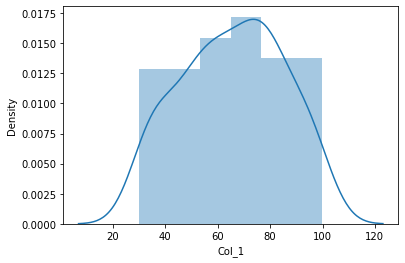

In [43]:
#histplot count col_1 with seaborn
sns.distplot(data['Col_1'])



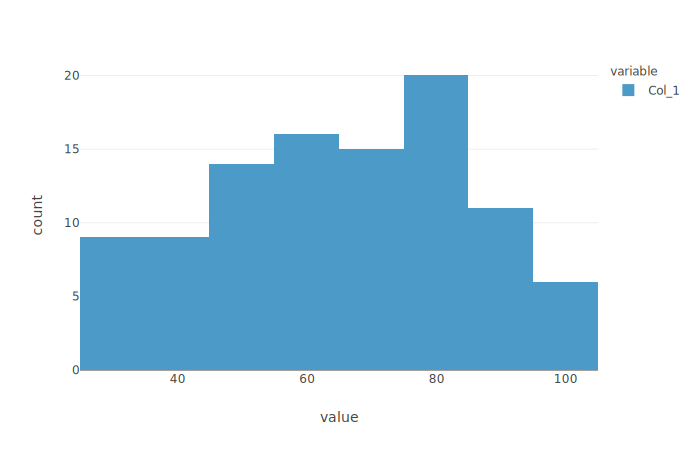

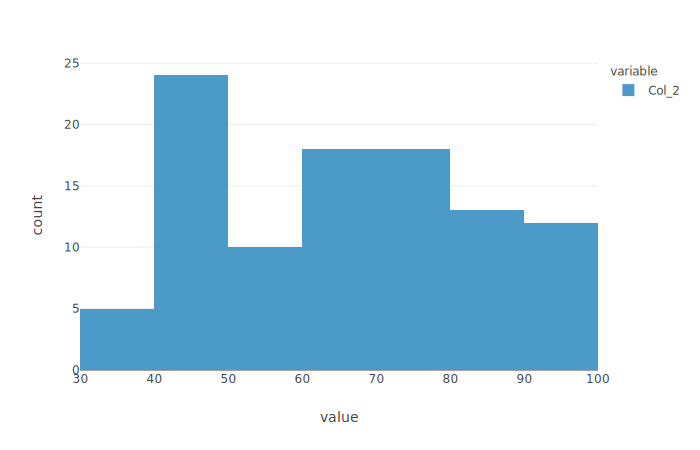

7. Use the LogisticRegression function from sklearn in order to create a model instance and train it on the training data.

In [62]:
# LogisticRegression function from sklearn
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, Y_train)

Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

Y_test_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1],
      dtype=int64)

8. what's the accuracy on the train set ? and on the test set ?

In [63]:
from sklearn.metrics import accuracy_score
print ('Accuracy in train : ', accuracy_score(Y_train, Y_train_pred))
print ('Accuracy in test : ', accuracy_score(Y_test, Y_test_pred))

Accuracy in train :  0.8875
Accuracy in test :  0.95


9. what's the average score with a cross-validation using K=10, what's the score's standard deviation?

In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reg, X_train, Y_train, cv=10)
print ('The cross-validated accuracy : ', scores.mean())
print ('The standard deviation : ', scores.std())

The cross-validated accuracy :  0.8875
The standard deviation :  0.11792476415070755


10. Create an object containing the model's predictions on the train/test sets.

In [67]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

NameError: name 'classifier' is not defined

11. Display the confusion matrix derived from the predictions performed by your model on the training data, do the same on your test data. What do you think of your model's performance, do you think it would generalize well on unknown data?

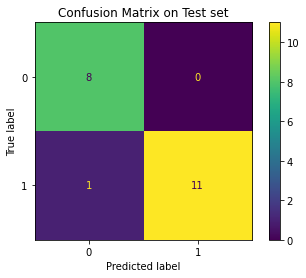

**From questions 9, 10 and 11 we can deduce that the generalized performances are very good ! Indeed, the test accuracy is comparable to the train accuracy and we can see in the confusion matrix that the prediction errors are very rare 🥳🥳**

12. Produce the ROC curve for the test set

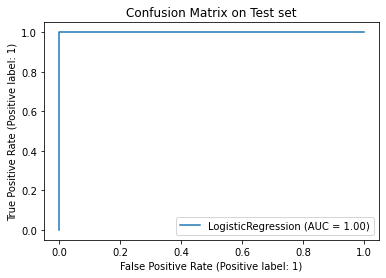

**The area under the curves is quite low. This means that the model is very sensitive to the choice of the threshold used in the logistic regression.**

13. Create a dataframe named df that contains the explanatory variables, the target variable and the estimated probabilites from the classifier. Then use the library mlxtend to plot the decision boundary of the model. You might need to install it before : 
```python
!pip install mlextend
```
This documentation page might help you 😉 : http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/

,Col_1,Col_2,proba,y
47,1.616330,1.097413,0.998408,1
43,1.248701,1.139486,0.996786,1
12,0.655663,1.631810,0.995509,1
26,1.719557,0.323877,0.994534,1
50,0.738202,1.387693,0.994042,1
...,...,...,...,...
8,-1.558775,-0.321138,0.047573,0
45,-0.506668,-1.658564,0.036440,0
59,-1.782960,-0.903145,0.010241,0
44,-1.649222,-1.241779,0.007217,0


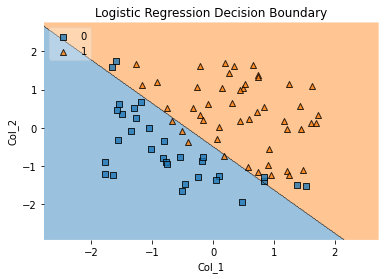